# 3. Data Modeling

## Implement Baselines

To fit our baseline model we will use OLS (Ordinary Least Squares Regression). We will split our dataset into a train and test (65 / 35) and run 10 Linear Regression simulations to calculate the Train and Test Score. 

In [93]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
import pylab
import scipy.stats as stats
%matplotlib inline

In [91]:
# helper function for plotting residual plots
def plot_residual(ax1, ax2, ax3, y_pred, y_real, line_label, title):
    ax1.scatter(y_pred, 
                y_real, 
                color='blue',
                alpha=0.6,
                label=line_label)
    ax1.set_xlabel('Predicted Y') 
    ax1.set_ylabel('Real Y')
    ax1.legend(loc='best')
    ax1.set_title(title)

    ax2.scatter(y_pred,
                y_real - y_pred, 
                color='green',
                marker='x',
                alpha=0.6,
                label='Residual')
    ax2.set_xlabel('Predicted Y')
    ax2.set_ylabel('Residual')
    
    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')

    ax2.legend(loc='best')
    ax2.set_title('Residual Plot')
    
    ax3.hist(y_real - y_pred, bins=30, color='green', alpha=0.7)
    ax3.set_title('Histogram of residual values')
    
    return ax1, ax2, ax3

In [7]:
data = pd.read_csv('../datasets/listings_clean.csv')
data.head()

,id,host_id,accommodates,bedrooms,beds,guests_included,number_of_reviews,host_listing_count,10001,10002,...,40-49,50-59,60-69,70-79,80-84,85-89,90-95,95-100,No Reviews,price
0,1069266,5867023,-0.517323,-0.405960,-0.490869,0.500815,2.672420,-0.359693,0,0,...,0,0,0,0,0,1,0,0,0,160.0
1,2061725,4601412,-0.517323,-0.405960,0.387294,-0.459368,1.269925,0.927756,0,0,...,0,0,0,0,0,0,0,1,0,58.0
2,44974,198425,-0.517323,-0.405960,-0.490869,-0.459368,0.802427,-0.359693,0,0,...,0,0,0,0,0,0,0,1,0,185.0
3,4701675,22590025,-0.517323,-0.405960,0.387294,-0.459368,-0.496178,-0.359693,0,0,...,0,0,0,0,0,0,0,1,0,195.0
4,68914,343302,1.693096,1.271321,1.265456,0.500815,0.282985,0.069457,0,0,...,0,0,0,0,0,0,0,1,0,165.0


In [9]:
# split into x and y (note that we do not include id and host_id as predictors)
x = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [69]:
def linear_regression(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
    regression = Lin_Reg(fit_intercept=True)
    regression.fit(x_train, y_train)
    train_score = regression.score(x_train, y_train)
    test_score = regression.score(x_test, y_test)
    return train_score, test_score

# plots residual plots for linear regression
def plot_residuals_lin_reg():
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
    regression = Lin_Reg(fit_intercept=True)
    regression.fit(x_train, y_train)
    y_pred = regression.predict(x_train)
    y_pred_test = regression.predict(x_test)
    df_train = pd.DataFrame({'y_pred': y_pred, 'y_real': y_train})
    df_test = pd.DataFrame({'y_pred_test': y_pred_test, 'y_real_test': y_test})
    return regression.score(x_train, y_train), regression.score(x_test, y_test), df_train, df_test

In [36]:
# 10 iterations
training_scores = [None]*10
testing_scores = [None]*10

for i in range(10):
    training_scores[i], testing_scores[i] = linear_regression(x, y)

print 'Mean Train Score:', np.mean(training_scores)
print 'Mean Test Score:', np.mean(testing_scores)

Mean Train Score: 0.305451383823
Mean Test Score: -4.04062921668e+18


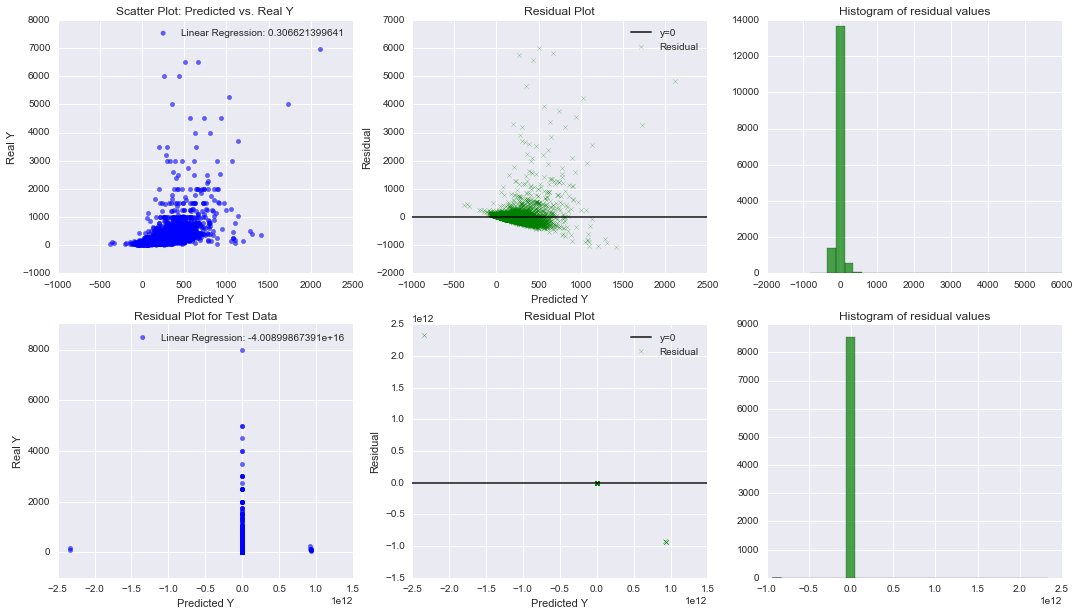

In [92]:
# plot the residuals of a linear regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

data_vals = plot_residuals_lin_reg()
plot_residual(axes[0][0], axes[0][1], axes[0][2], data_vals[2]['y_pred'], data_vals[2]['y_real'], 'Linear Regression: {}'.format(data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], data_vals[3]['y_pred_test'], data_vals[3]['y_real_test'], 'Linear Regression: {}'.format(data_vals[1]), 'Residual Plot for Test Data')
plt.show()

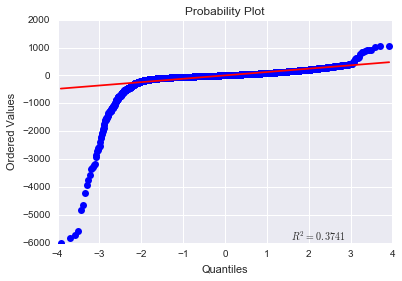

In [96]:
# qq plot for the train residuals
stats.probplot(data_vals[2]['y_pred'] - data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

We see that while we are achieving a low $R^2$ score on the train set, we are achieving an extremely negative $R^2$ score on the test set. Based on the residual plots for the train, we can see that a linear regression does not perform well as it predicts a negative price when the actual price is close to 0. From the residual plot itself, we see a strong outwards shaping pattern in the residuals which indicates non-linearity in the data. Plotting a Q-Q plot of the train residuals, we see that the residuals are indeed not normally distributed. Plotting the residuals in the test, we can see that a majority of the values were predicted to be 0 while there were several cases were the real y-value was not 0 and was sometimes as high as 8000 in price. Such discrepency in the predictions from the actual values explains why such a low negative $R^2$ was obtained. We next fit a RidgeCV regression.

In [97]:
# ridge regression: compute train and test score
def ridge_regression(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
    reg_params = 10.**np.linspace(-10, 5, 10)
    ridge = RidgeCV(alphas=reg_params, fit_intercept=True, cv=5)
    ridge.fit(x_train, y_train)
    train_score = ridge.score(x_train, y_train)
    test_score = ridge.score(x_test, y_test)
    return train_score, test_score

# plots residual plots for ridge regression
def plot_residuals_ridge_reg():
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
    reg_params = 10.**np.linspace(-10, 5, 10)
    ridge = RidgeCV(alphas=reg_params, fit_intercept=True, cv=5)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_train)
    y_pred_test = ridge.predict(x_test)
    df_train = pd.DataFrame({'y_pred': y_pred, 'y_real': y_train})
    df_test = pd.DataFrame({'y_pred_test': y_pred_test, 'y_real_test': y_test})
    return ridge.score(x_train, y_train), ridge.score(x_test, y_test), df_train, df_test

In [11]:
# perform 10 iterations
training_scores = [None]*10
testing_scores = [None]*10

# compute ridge regression train and test score
for i in range(10):
    training_scores[i], testing_scores[i] = ridge_regression(x, y)
#     print 'Train Score {}:'.format(i+1), training_scores[i]
#     print 'Test Score {}:'.format(i+1), testing_scores[i], '\n'

print 'Mean Train Score:', np.mean(training_scores)
print 'Mean Test Score:', np.mean(testing_scores)

Mean Train Score: 0.298820752829
Mean Test Score: 0.292137226259


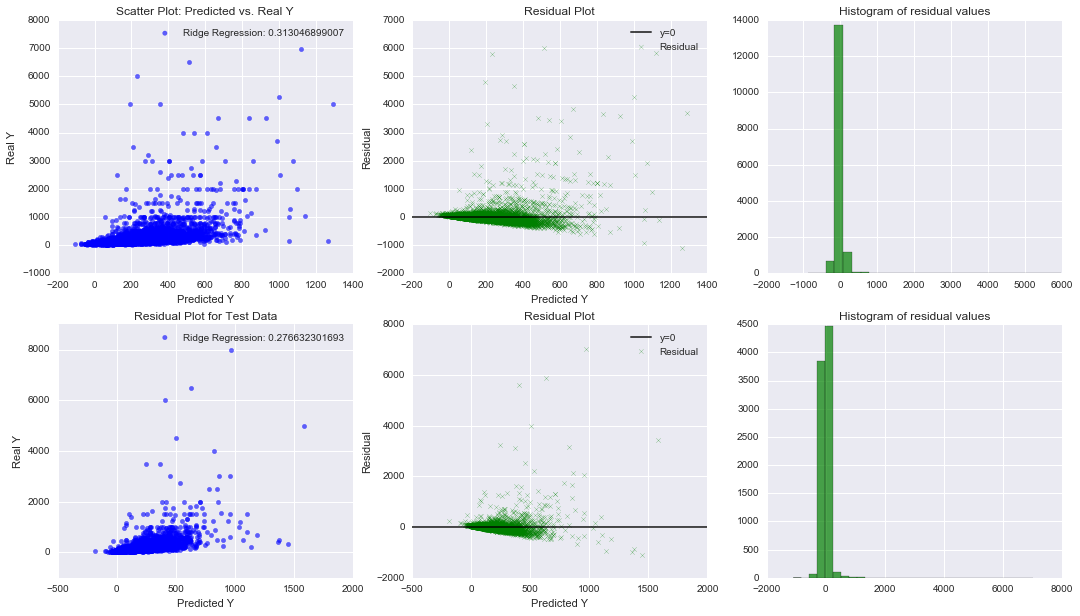

In [100]:
# plot the residuals of a linear regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = plot_residuals_ridge_reg()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(data_vals[1]), 'Residual Plot for Test Data')
plt.show()

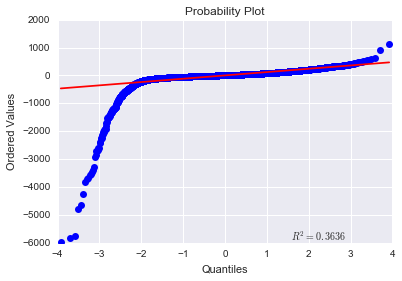

In [102]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

In [103]:
# lasso regression: compute train and test score
def lasso_regression(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
    reg_params = 10.**np.linspace(-10, 5, 10)
    lasso = LassoCV(alphas=reg_params, fit_intercept=True, cv=5)
    lasso.fit(x_train, y_train)
    train_score = lasso.score(x_train, y_train)
    test_score = lasso.score(x_test, y_test)
    return train_score, test_score

# plots residual plots for ridge regression
def plot_residuals_lasso_reg():
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
    reg_params = 10.**np.linspace(-10, 5, 10)
    lasso = LassoCV(alphas=reg_params, fit_intercept=True, cv=5)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_train)
    y_pred_test = lasso.predict(x_test)
    df_train = pd.DataFrame({'y_pred': y_pred, 'y_real': y_train})
    df_test = pd.DataFrame({'y_pred_test': y_pred_test, 'y_real_test': y_test})
    return lasso.score(x_train, y_train), lasso.score(x_test, y_test), df_train, df_test

In [11]:
# perform 10 iterations
training_scores = [None]*10
testing_scores = [None]*10

# compute ridge regression train and test score
for i in range(10):
    training_scores[i], testing_scores[i] = lasso_regression(x, y)

print 'Mean Train Score:', np.mean(training_scores)
print 'Mean Test Score:', np.mean(testing_scores)

/Users/slamfyre175/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


Mean Train Score: 0.298946032747
Mean Test Score: 0.291913140191


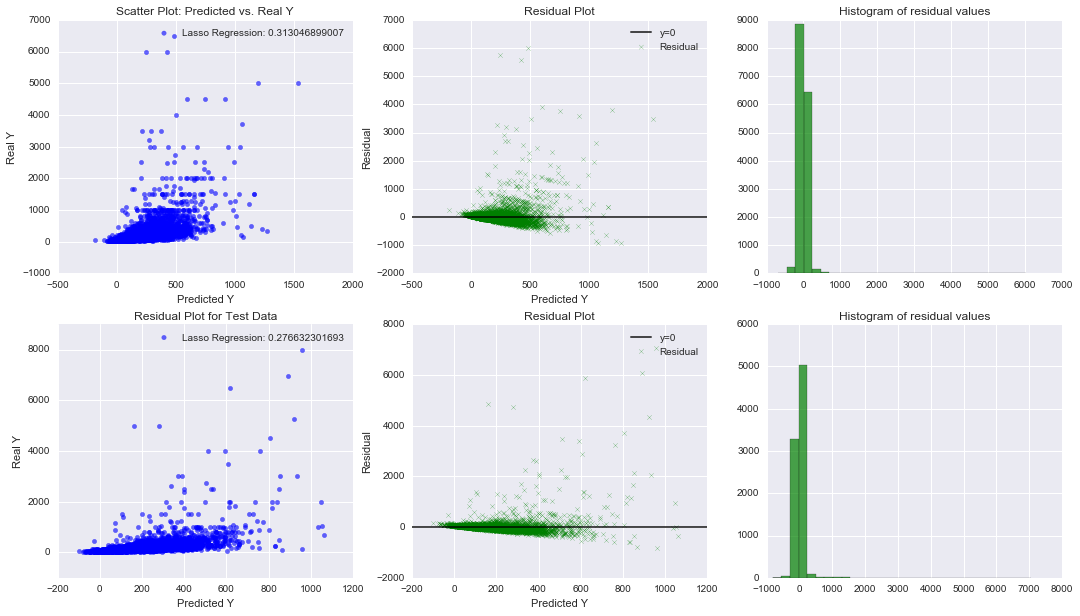

In [106]:
# plot the residuals of a linear regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

lasso_data_vals = plot_residuals_lasso_reg()
plot_residual(axes[0][0], axes[0][1], axes[0][2], lasso_data_vals[2]['y_pred'], lasso_data_vals[2]['y_real'], 'Lasso Regression: {}'.format(data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], lasso_data_vals[3]['y_pred_test'], lasso_data_vals[3]['y_real_test'], 'Lasso Regression: {}'.format(data_vals[1]), 'Residual Plot for Test Data')
plt.show()

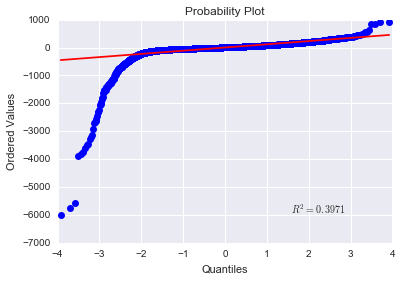

In [107]:
# qq plot for the train residuals
stats.probplot(lasso_data_vals[2]['y_pred'] - lasso_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

We see that using Ridge Regression as well as Lasso Regression perform similarly with the training data. While the predictions for the testing data have shown a dramatic increase in $R^2$. Both Ridge and Lasso Regressions perform incredibly similar. We see that for all Linear Regression, Ridge and Lasso the train scores are more or less the same.

In [8]:
#Function for calculating BIC
BIC = lambda n, d, RSS: n * np.log(RSS * 1. / n) + d * np.log(n)
#Function for calculating Residual Sum of Squares
RSS = lambda predict, actual: np.sum((predict - actual)**2)

#Function for finding the best polynomial model using Ridge polynomial regression
def best_poly_model(pred, response, max_deg, reg_params):
    #Best regularization parameter for each degree
    lambdas = []
    #Best BIC for each degree
    bics = []
    #Best model parameters for each degree
    params = []
    
    #Iterate through degrees 1 to max_degree
    for degree in range(2, max_deg):
        #Turn one predictor into 1, t, t^2, t^3, ...
        poly_t = PolynomialFeatures(degree=degree)
        pred_expanded = poly_t.fit_transform(pred)
        
        #Perform Ridge regression using expanded set of predictors, 
        #choose best regularization parameter lambda using 5-fold x-validation
        ridge = RidgeCV(alphas=reg_params, fit_intercept=True, cv=5)
        ridge.fit(pred_expanded, response)
        
        #Record the parameters of the model chosen by 5-fold x-validation
        params.append(ridge.coef_)
        #Record the lambda chosen by 5-fold x-validation
        lambdas.append(ridge.alpha_)
        
        #Record the BIC score of the model chosen by 5-fold x-validation
        response_hat = ridge.predict(pred_expanded)        
        error = RSS(response_hat, response)
        bics.append(BIC(pred.shape[0], degree, error))
    
    #Find the degree with the min BIC score
    best_degree = np.argmin(bics) + 1
    #Find the best lambda for the degree with the min BIC score
    best_lambda = lambdas[best_degree - 1]
    #Find the best model parameters for the degree with the min BIC score
    best_params = params[best_degree - 1]
    return best_degree, best_lambda, best_params       

## --------Warning---------

This code takes forever to run. Would suspect the amount of observations is throwing off the polynomial prediction.

In [ ]:
reg_params = 10.**np.linspace(-10, 5, 10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
best_degree, best_lambda = best_poly_model(x_train, y_train, 3, reg_params)    

/Users/slamfyre175/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [ ]:
print best_degree, best_lambda

In [ ]:
poly_t = PolynomialFeatures(degree=best_degree)
pred_expanded = poly_t.fit_transform(x_train)
pred_test_expanded = poly_t.fit_transform(x_test)
ridge = RidgeCV(alphas=[best_lambda], fit_intercept=True, cv=5)
ridge.fit(pred_expanded, y_train)
train_score = ridge.score(pred_expanded, y_train)
test_score = ridge.score(pred_test_expanded, y_test)

In [ ]:
print train_score
print test_score

In [26]:
# random forest regressor
def random_forest_model(x_train, y_train, x_test, y_test):
#     best_num_p = 0
#     best_num_tree = 0
    best_test_score = 0
    best_train_score = 0
    best_depth = 0
    # tune for tree depth from 1 to 20
    for j in range(1, 21):
        rf = RandomForestRegressor(n_estimators=50, max_depth=j, oob_score=True)
        rf.fit(x_train, y_train)
        score_train = rf.score(x_train, y_train)
        score = rf.score(x_test, y_test)
        if score > best_test_score:
            best_test_score = score
            best_train_score = score_train
            best_depth = j
#             best_num_p = i
#             best_num_tree = j
    return best_train_score, best_test_score, best_depth

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
rf_values = random_forest_model(x_train, y_train, x_test, y_test)

In [30]:
print 'Train Score with Best Test:', rf_values[0]
print 'Best Test Score:', rf_values[1]
print 'Best Depth', rf_values[2]

Train Score with Best Test: 0.71505930968
Best Test Score: 0.29267540047
Best Depth 16


We see a significantly higher train score for Random Forest Regressor but a similar Test Score in comparison to the other linear regressions, which indicates overfitting. Based on these model performances we will most likely need to reanalyze different strategies or transform the target variable to yield better results.